In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

RAND_STATE = 32 # for reproducible shuffling
TT_RATIO = 0.25 # test/train

from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_paris = pd.read_csv('data_paris.csv')

In [3]:
data_paris = data_paris.drop(['Unnamed: 0'], axis=1)

In [4]:
from scipy import stats

# Assuming df is the name of your dataframe
z_scores = np.abs(stats.zscore(data_paris))

# Remove rows where any of the columns have a z-score greater than 3
data_paris_cleaned = data_paris[(z_scores < 3).all(axis=1)]

In [5]:
data_paris_cleaned.corr()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat,room_shared_True,room_private_True,host_is_superhost_True,weekend_yes
realSum,1.000000,0.529206,0.011214,0.214295,0.091619,0.074427,0.381207,-0.194181,-0.036374,0.399543,0.327412,-0.167514,-0.036446,NaN,-0.214878,0.049336,-0.011711
person_capacity,0.529206,1.000000,-0.019480,0.112178,-0.080120,-0.059231,0.466064,-0.076825,-0.018205,0.070885,0.067509,0.010319,-0.002025,NaN,-0.291238,-0.078385,0.008354
multi,0.011214,-0.019480,1.000000,-0.294273,0.023747,0.005611,0.055316,0.038625,0.022497,-0.003094,-0.017686,-0.041606,-0.032152,NaN,0.224341,0.038572,-0.012220
biz,0.214295,0.112178,-0.294273,1.000000,-0.043354,-0.227618,-0.059348,-0.146862,-0.093863,0.201049,0.218291,-0.020523,0.036269,NaN,0.095679,-0.110356,-0.024412
cleanliness_rating,0.091619,-0.080120,0.023747,-0.043354,1.000000,0.609317,0.045112,0.024564,-0.019897,0.006494,-0.000906,-0.034283,-0.009267,NaN,0.108911,0.246727,0.005222
guest_satisfaction_overall,0.074427,-0.059231,0.005611,-0.227618,0.609317,1.000000,0.096352,0.049100,-0.001880,-0.026317,-0.043039,-0.019274,0.016025,NaN,0.020435,0.244214,0.019849
bedrooms,0.381207,0.466064,0.055316,-0.059348,0.045112,0.096352,1.000000,0.010802,0.014824,-0.032300,-0.025973,0.014689,0.005073,NaN,0.091498,0.047356,0.006872
dist,-0.194181,-0.076825,0.038625,-0.146862,0.024564,0.049100,0.010802,1.000000,0.255484,-0.541064,-0.717262,-0.525677,0.089938,NaN,0.074167,0.025639,-0.012422
metro_dist,-0.036374,-0.018205,0.022497,-0.093863,-0.019897,-0.001880,0.014824,0.255484,1.000000,-0.151972,-0.230045,-0.133177,-0.059728,NaN,-0.019323,0.002497,-0.005127
attr_index_norm,0.399543,0.070885,-0.003094,0.201049,0.006494,-0.026317,-0.032300,-0.541064,-0.151972,1.000000,0.815772,-0.240647,0.040195,NaN,-0.079309,0.000316,0.018261


In [33]:
data_paris_cleaned_reg = data_paris_cleaned.drop(['lng', 'lat', 'weekend_yes'], axis=1)

In [34]:
x = data_paris_cleaned_reg.drop('realSum', axis=1)
y = data_paris_cleaned_reg.realSum

In [35]:
# test-train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TT_RATIO, random_state=RAND_STATE)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
x_train.describe()

,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,room_shared_True,room_private_True,host_is_superhost_True
count,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.0,4554.000000,4554.000000
mean,2.874616,0.210365,0.239130,9.349363,92.867809,0.919192,2.976353,0.221076,17.941175,42.552730,0.0,0.233202,0.146245
std,1.143686,0.407612,0.426599,0.778184,6.643315,0.554965,1.438133,0.109390,6.858243,15.203096,0.0,0.422916,0.353391
min,2.000000,0.000000,0.000000,7.000000,67.000000,0.000000,0.070000,0.000000,5.654976,11.933258,0.0,0.000000,0.000000
25%,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.830000,0.140000,12.820440,30.360625,0.0,0.000000,0.000000
50%,2.000000,0.000000,0.000000,10.000000,94.000000,1.000000,3.000000,0.210000,16.459762,40.559221,0.0,0.000000,0.000000
75%,4.000000,0.000000,0.000000,10.000000,98.000000,1.000000,3.987500,0.280000,21.916534,53.012007,0.0,0.000000,0.000000
max,6.000000,1.000000,1.000000,10.000000,100.000000,2.000000,7.330000,0.590000,41.217593,89.419780,0.0,1.000000,1.000000


In [36]:
x_train_const = sm.add_constant(x_train) # adding a constant

model = sm.OLS(y_train, x_train_const).fit()
predictions_train = model.predict(x_train_const)

x_test_const = sm.add_constant(x_test) # adding a constant
predictions_test = model.predict(x_test_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     373.1
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:05:37   Log-Likelihood:                -28875.
No. Observations:                4554   AIC:                         5.778e+04
Df Residuals:                    4541   BIC:                         5.786e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [37]:
sts = StandardScaler()

x_train_standarized = sts.fit_transform(x_train)
x_test_standarized = sts.transform(x_test)

x_train_standarized = pd.DataFrame(x_train_standarized)

In [12]:
x_train_const = sm.add_constant(x_train_standarized.to_numpy()) # adding a constant

model = sm.OLS(y_train, x_train_const).fit()
predictions_train = model.predict(x_train_const)

x_test_const = sm.add_constant(x_test_standarized) # adding a constant
predictions_test = model.predict(x_test_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     492.5
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:51:15   Log-Likelihood:                -28887.
No. Observations:                4554   AIC:                         5.779e+04
Df Residuals:                    4544   BIC:                         5.786e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        368.9552      2.041    180.775      0.0

In [13]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)
model.coef_
model.intercept_

-375.48191698334716

In [14]:
model.score(x_train, y_train)

0.4937693516909234

In [15]:
y_pred = pd.DataFrame(model.predict(x_test),columns = ['realSum'] )      # model prediction
y_pred_train =  pd.DataFrame(model.predict(x_train),columns = ['realSum'])

In [16]:
mse(y_test,y_pred)

20266.24167657376

In [17]:
rmse = np.sqrt(mse(y_test,y_pred))
rmse

142.35955070375067

In [18]:
##prediction on the train set
mse(y_train,y_pred_train)

18928.143980131066

In [19]:
mae(y_test,y_pred)

98.01539778538611

In [20]:
R2=r2_score(y_test,y_pred)
R2

0.5037967307115225

In [21]:
R2_test=model.score(x_test,y_test)
R2_train=model.score(x_train,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
Adj_R2

0.5005040746445784

In [22]:
model_lasso=Lasso(alpha=0.05)

model_lasso.fit(x_train, y_train)
print(f"{model_lasso.__class__.__name__}: Train -> {model_lasso.score(x_train, y_train)}, Test -> {model_lasso.score(x_test, y_test)}")

Lasso: Train -> 0.4937659875027952, Test -> 0.5037449537690021


In [23]:
model_ridge=Ridge(alpha=1000)
model_ridge.fit(x_train, y_train)
print(f"{model_ridge.__class__.__name__}: Train -> {model_ridge.score(x_train, y_train)}, Test -> {model_ridge.score(x_test, y_test)}")

Ridge: Train -> 0.46526459490234806, Test -> 0.4706885126563233


In [24]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

print("X_train has %d rows and %d columns"  %(x_train.shape[0],x_train.shape[1]))
print("-----------------------------------")
print("The coefficient of determination for the test data is R2=%.2f"
      %(model.score(x_test, y_test)))
print("The coefficient of determination for the train data is R2=%.2f"
      %(model.score(x_train, y_train)))


X_train has 4554 rows and 10 columns
-----------------------------------
The coefficient of determination for the test data is R2=0.54
The coefficient of determination for the train data is R2=1.00


In [25]:
scores=cross_val_score(model, x_train, y_train, cv=5)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation scores:  [0.44096179 0.46356436 0.40181348 0.51258157 0.43197352]
Score stats: 0.45 accuracy with a standard deviation of 0.04


In [26]:
model1 = DecisionTreeRegressor()
model2 = LinearRegression()
model3 = KNeighborsRegressor()

model_pipeline = [model1, model2, model3]
model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, x_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Regression Tree': 0.4543501359411556, 'Linear Regression': 0.48919030654777895, 'KNN': 0.45356380827924003}


ValueError: The 'color' keyword argument must have one color per dataset, but 1519 datasets and 1 colors were provided

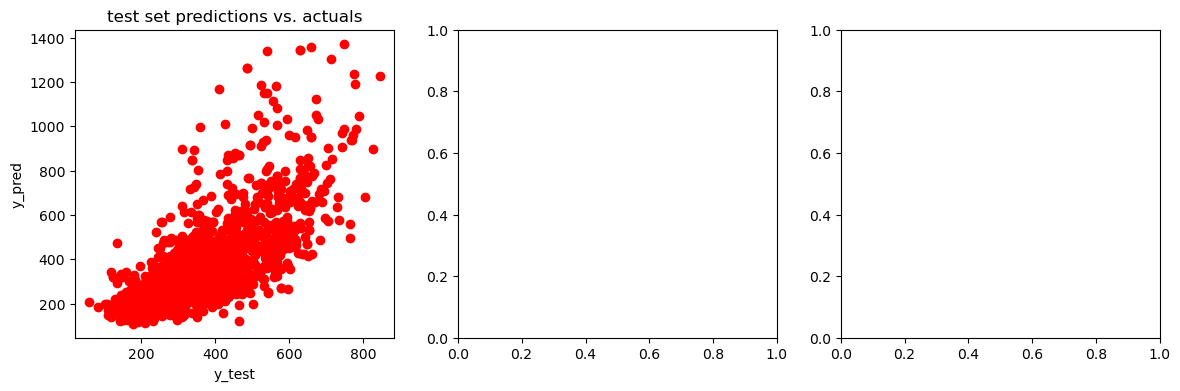

In [28]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

# forms a line?
ax[0].plot(y_pred, y_test, 'o', color='red')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("test set predictions vs. actuals")

# normal distribution?
ax[1].hist(y_test - y_pred, color='blue')
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("test set residuals")

# constant?
ax[2].plot(y_pred,y_test - y_pred,"o", color='green')
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("residual homoscedasticity")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed', color='black',linewidth=2)

In [27]:
data_paris_cleaned.to_excel('data_paris.xlsx')

In [27]:
#data_paris_geo.to_excel('data_paris_geo.xlsx')

In [28]:
#paris = pd.concat((data_paris_cleaned, data_paris_geo), axis=1)
#paris.to_excel('paris.xlsx')

In [29]:
import pysal

# Create spatial weights matrix
w = pysal.lib.weights.Queen.from_dataframe(data_paris)

# Create spatial lag variable
y_lag = pysal.lib.weights.lag_spatial(w, data['y'])

# Ordinary least squares (OLS) regression
model = pysal.model.spreg.OLS(y, x, w=w, name_y='y', name_x=['x1', 'x2'])

# Get summary of regression results
print(model.summary)

AttributeError: partially initialized module 'fiona' has no attribute '_loading' (most likely due to a circular import)

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from pysal.model import spreg
from pysal.lib import weights

In [ ]:

from scipy import stats
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import osmnx as ox


In [ ]:
query = {'city' : 'Paris'}

boundaries = ox.geocode_to_gdf(query, buffer_dist=1000)